In [1]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual class')
        plt.xlabel('Predicted class' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [3]:
data = pd.read_csv('C:/Users/ANAS/Desktop/perf/perf_vm/MU/mucomb.csv')

X = data.drop(['val','aro','posneg','dem'], axis=1)
y = data['val']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

In [4]:
scaler_ss = preprocessing.StandardScaler()
scaler_mm = preprocessing.MinMaxScaler()
########################################################
X_train_ss = scaler_ss.fit_transform(X_train, y_train)
X_test_ss = scaler_ss.transform(X_test)

X_train_mm = scaler_mm.fit_transform(X_train, y_train)
X_test_mm = scaler_mm.transform(X_test)

In [5]:
#CROSS VALIDATION
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

WITHOUT FEATURE SELECTION & REDUCTION

In [ ]:
#CLASSIFIER
model_knn = KNeighborsClassifier()
parameters_knn1 = {'n_neighbors': [2],
              'weights': ['distance'], 
              'metric': ['manhattan']}

parameters_knn2 = {'n_neighbors': [2],
              'weights': ['distance'], 
              'metric': ['manhattan']}

In [ ]:
#KNN TRAINING
gs_ss_knn = GridSearchCV(model_knn, parameters_knn1, refit=True, cv=cv, verbose=3, return_train_score=True, n_jobs=-1) 
gs_ss_knn.fit(X_train_ss, y_train)
print(gs_ss_knn.best_estimator_)
print(gs_ss_knn.cv_results_)

In [ ]:
gs_mm_knn = GridSearchCV(model_knn, parameters_knn2, refit=True, cv=cv, verbose=3, return_train_score=True, n_jobs=-1) 
gs_mm_knn.fit(X_train_mm, y_train)
print(gs_mm_knn.best_estimator_)
print(gs_mm_knn.cv_results_)

In [ ]:
#KNN TESTING
print('##################### KNN TESTING #####################')
print('StandardScaler________________________________________')
gp_ss_knn = gs_ss_knn.predict(X_test_ss)
cf_ss = confusion_matrix(y_test,gp_ss_knn)
# print(cf_ss)
print(classification_report(y_test,gp_ss_knn))

print('MinMaxScaler__________________________________________')
gp_mm_knn = gs_mm_knn.predict(X_test_mm)
cf_mm = confusion_matrix(y_test,gp_mm_knn)
# print(cf_mm)
print(classification_report(y_test,gp_mm_knn))

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
fig_cf_ss = make_confusion_matrix(cf_ss, group_names=labels, figsize=(6,4), title='Testing Confusion Matrix (SS, KNN)', cbar=True, cmap='Oranges')
plt.savefig('/home/ceci/Desktop/perf/DATA_MU/CF/ALL_VAL_SS_KNN.png')
plt.show()

fig_cf_mm = make_confusion_matrix(cf_mm, group_names=labels, figsize=(6,4), title='Testing Confusion Matrix (MM, KNN)', cbar=True, cmap='Oranges')
plt.savefig('/home/ceci/Desktop/perf/DATA_MU/CF/ALL_VAL_MM_KNN.png')
plt.show()

WITH SFS FEATURE SELECTION

In [7]:
#### SFS KNN
knn_s = KNeighborsClassifier(n_neighbors=2, metric='manhattan', weights='distance')

sfs_ss_knn = SFS(estimator=knn_s, 
           k_features=5,
           forward=True, 
           floating=False, 
           scoring='accuracy',
        #    cv=2,
           n_jobs=-1)
sfs_ss_knn.fit(X_train_ss, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(metric='manhattan',
                                                         n_neighbors=2,
                                                         weights='distance'),
                          k_features=5, n_jobs=-1, scoring='accuracy')

best combination (ACC: 0.892): (1, 6, 9, 19, 65)



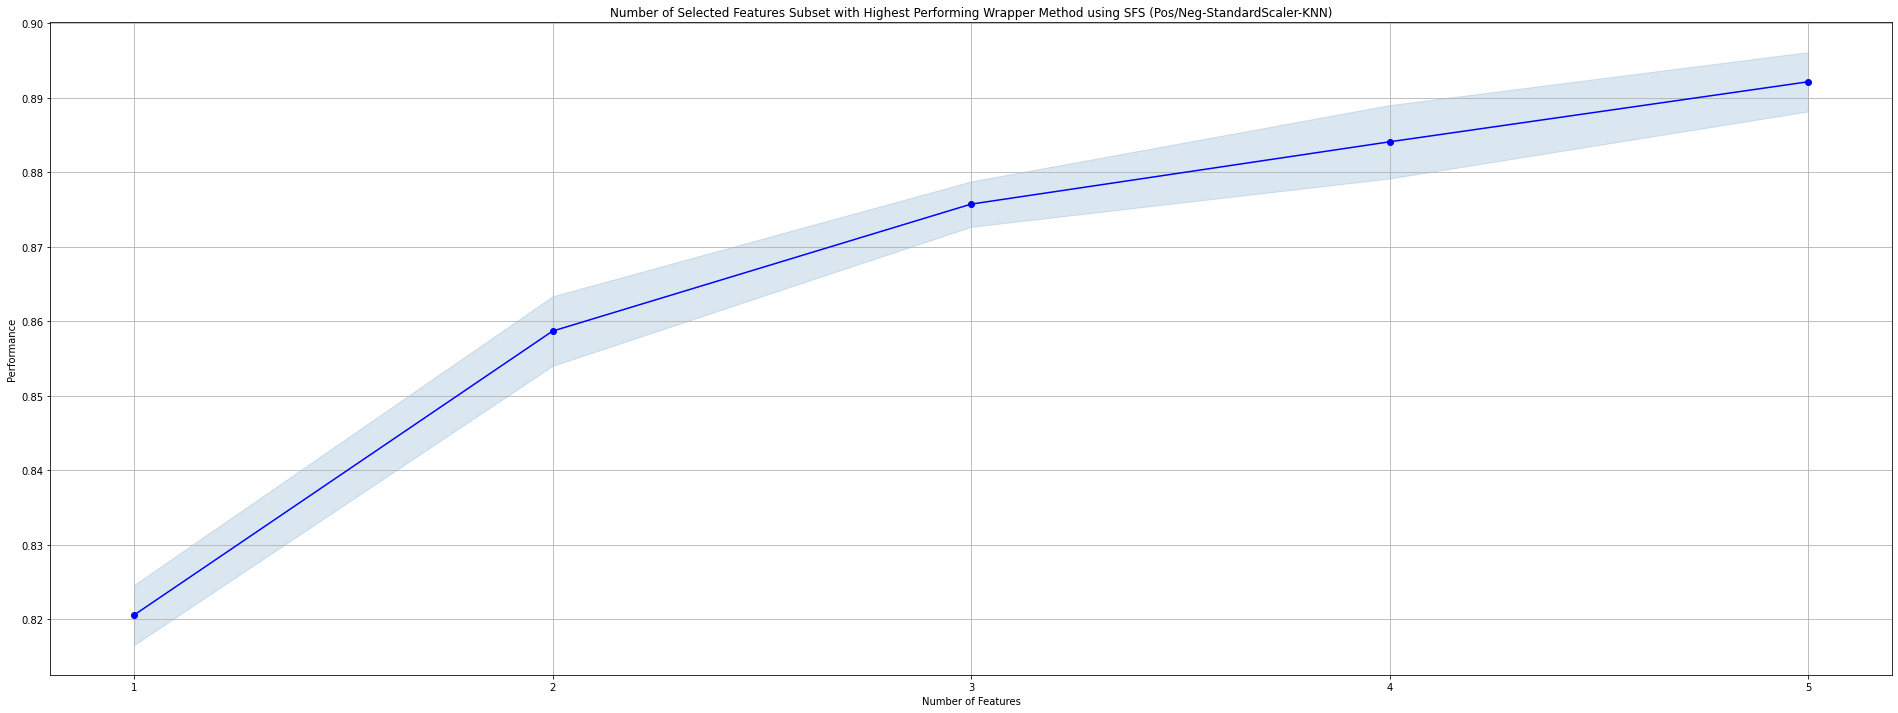

In [8]:
print('best combination (ACC: %.3f): %s\n' % (sfs_ss_knn.k_score_, sfs_ss_knn.k_feature_idx_))
#print('all subsets:\n', sfs_ss.subsets_)
fig1 = plot_sfs(sfs_ss_knn.get_metric_dict(), figsize=(33,12) ,kind='std_err')
plt.title('Number of Selected Features Subset with Highest Performing Wrapper Method using SFS (Pos/Neg-StandardScaler-KNN)')
plt.grid()
# plt.savefig('C:/Users/ANAS/Desktop/perf/perf_vm/MU/MUPNSFSssKNN.jpg')
plt.show()

In [9]:
knn_m = KNeighborsClassifier(n_neighbors=2, metric='manhattan', weights='distance')

sfs_mm_knn = SFS(estimator=knn_m, 
           k_features=5,
           forward=True, 
           floating=False, 
           scoring='accuracy',
        #    cv=5,
           n_jobs=-1)
sfs_mm_knn.fit(X_train_mm, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(metric='manhattan',
                                                         n_neighbors=2,
                                                         weights='distance'),
                          k_features=5, n_jobs=-1, scoring='accuracy')

best combination (ACC: 0.893): (1, 6, 9, 19, 21)



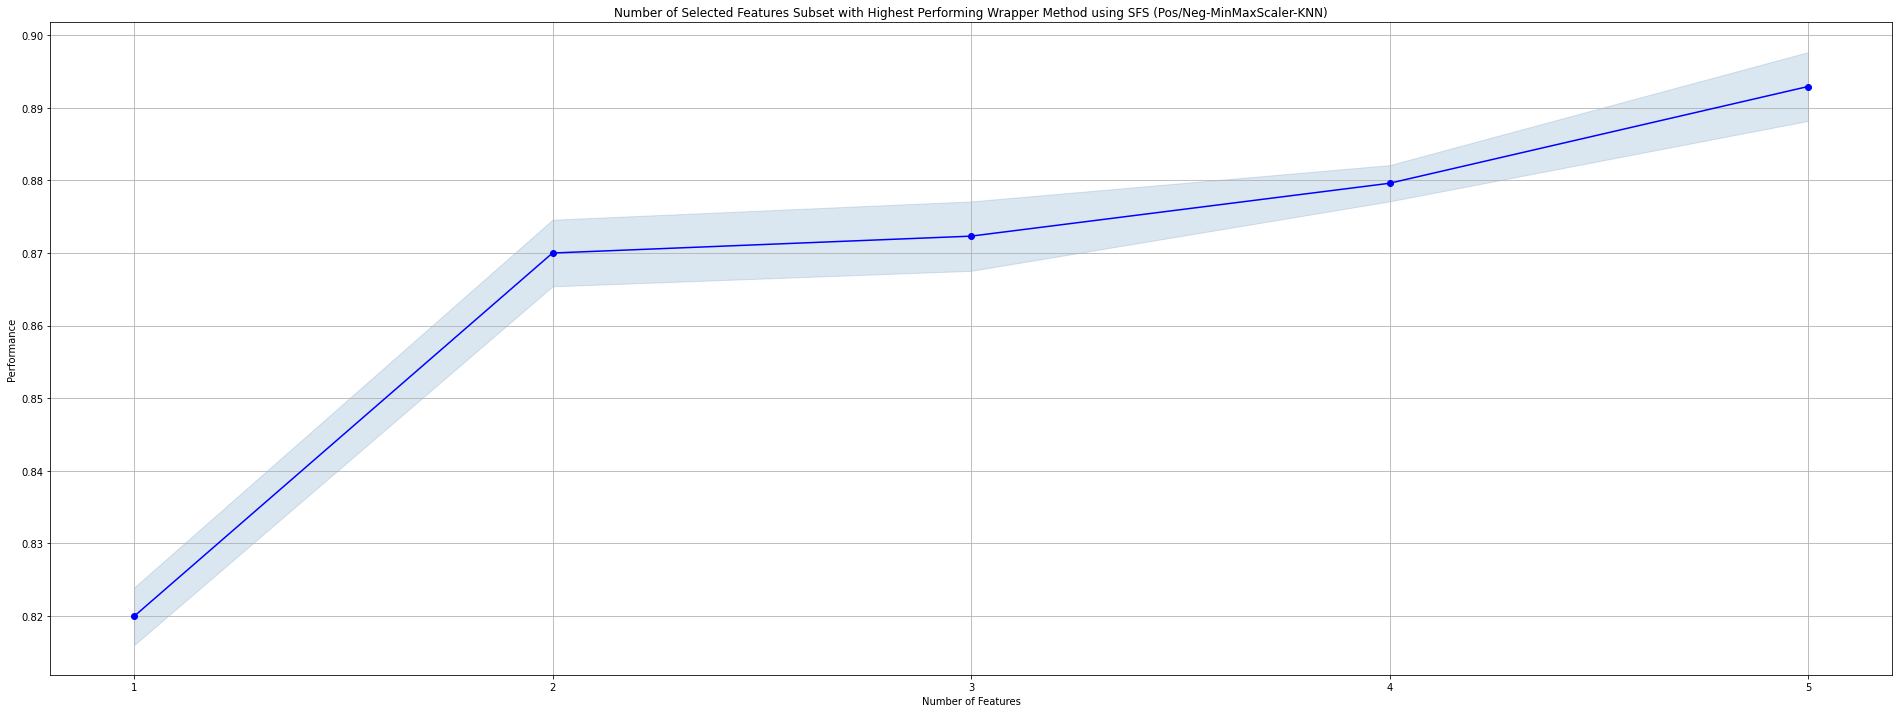

In [10]:
print('best combination (ACC: %.3f): %s\n' % (sfs_mm_knn.k_score_, sfs_mm_knn.k_feature_idx_))
#print('all subsets:\n', sfs_mm.subsets_)
fig2 = plot_sfs(sfs_mm_knn.get_metric_dict(), figsize=(33,12) ,kind='std_err')
plt.title('Number of Selected Features Subset with Highest Performing Wrapper Method using SFS (Pos/Neg-MinMaxScaler-KNN)')
plt.grid()
# plt.savefig('C:/Users/ANAS/Desktop/perf/perf_vm/MU/MUPNSFSmmKNN.jpg')
plt.show()

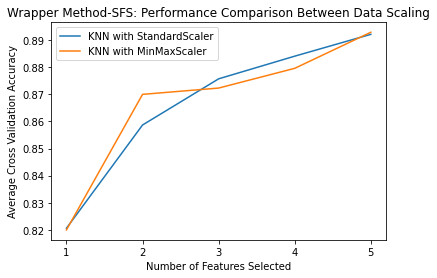

In [11]:
satu = pd.DataFrame.from_dict(sfs_ss_knn.get_metric_dict()).T
x_satu  = satu.index.values.tolist()
y_satu = satu['avg_score'].values.tolist()
# print(satu['feature_idx'])
plt.plot(x_satu, y_satu, label = "KNN with StandardScaler")

dua = pd.DataFrame.from_dict(sfs_mm_knn.get_metric_dict()).T
x_dua  = dua.index.values.tolist()
y_dua = dua['avg_score'].values.tolist()
# print(dua['feature_idx'])
plt.plot(x_dua, y_dua, label = "KNN with MinMaxScaler")


plt.xticks(x_dua) #kena tukar pada x scale yg paling bnyk
plt.xlabel('Number of Features Selected')
plt.ylabel('Average Cross Validation Accuracy')
plt.title('Wrapper Method-SFS: Performance Comparison Between Data Scaling')

plt.legend()
plt.rcParams["figure.figsize"] = (23,8)
# plt.savefig('/home/ceci/Desktop/perf/DATA_MU/CF/MU_PN_SFS.jpg')
plt.show()


In [12]:
#REMOVING THE USELESS COLUMNS FROM SFS
X_train_ss_sfs_knn = sfs_ss_knn.transform(X_train_ss)
X_test_ss_sfs_knn = sfs_ss_knn.transform(X_test_ss)

X_train_mm_sfs_knn = sfs_mm_knn.transform(X_train_mm)
X_test_mm_sfs_knn = sfs_mm_knn.transform(X_test_mm)

In [13]:
# param_grid = {'n_neighbors': [2, 3, 5, 7, 90, 45],
#               'weights': ['uniform', 'distance'],
#               'metric': ['euclidean', 'manhattan']}

param_grid_knn3 = {'n_neighbors': [2],
              'weights': ['distance'],
              'metric': ['manhattan']}

param_grid_knn4 = {'n_neighbors': [2],
              'weights': ['distance'],
              'metric': ['manhattan']}

In [14]:
grid_ss_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn3, refit=True,cv=cv,verbose=3,return_train_score=True, n_jobs=-1) 
grid_ss_knn.fit(X_train_ss_sfs_knn,y_train)
print(grid_ss_knn.best_estimator_)
print(grid_ss_knn.cv_results_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
{'mean_fit_time': array([0.03866723]), 'std_fit_time': array([0.00894285]), 'mean_score_time': array([0.01513422]), 'std_score_time': array([0.00143759]), 'param_metric': masked_array(data=['manhattan'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_neighbors': masked_array(data=[2],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['distance'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}], 'split0_test_score': array([0.93653251]), 'split1_test_score': array([0.8869969]), 'split2_test_score': array([0.90092879]), 'split3_test_score': array([0.89783282]), 'split4_test_score': array([0.89147287]), 'split5_test_score': array([0.89612403]), 'split

In [15]:
grid_mm_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn4, refit=True,cv=cv,verbose=3,return_train_score=True, n_jobs=-1) 
grid_mm_knn.fit(X_train_mm_sfs_knn,y_train)
print(grid_mm_knn.best_estimator_)
print(grid_mm_knn.cv_results_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')
{'mean_fit_time': array([0.03003063]), 'std_fit_time': array([0.0048372]), 'mean_score_time': array([0.01517038]), 'std_score_time': array([0.00435793]), 'param_metric': masked_array(data=['manhattan'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_neighbors': masked_array(data=[2],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['distance'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}], 'split0_test_score': array([0.93498452]), 'split1_test_score': array([0.89009288]), 'split2_test_score': array([0.90402477]), 'split3_test_score': array([0.8869969]), 'split4_test_score': array([0.88992248]), 'split5_test_score': array([0.88217054]), 'split6

In [16]:
print('################### SFS-KNN TESTING ###################')
print('StandardScaler________________________________________')
grid_predictions_ss_knn = grid_ss_knn.predict(X_test_ss_sfs_knn)
mat1 = confusion_matrix(y_test,grid_predictions_ss_knn)
# print(mat1)
print(classification_report(y_test,grid_predictions_ss_knn))

print('MinMaxScaler__________________________________________')
grid_predictions_mm_knn = grid_mm_knn.predict(X_test_mm_sfs_knn)
mat2 = confusion_matrix(y_test,grid_predictions_mm_knn)
# print(mat2)
print(classification_report(y_test,grid_predictions_mm_knn))

################### SFS-KNN TESTING ###################
StandardScaler________________________________________
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       674
           1       0.91      0.89      0.90       521
           2       0.88      0.91      0.90       419

    accuracy                           0.91      1614
   macro avg       0.91      0.91      0.91      1614
weighted avg       0.91      0.91      0.91      1614

MinMaxScaler__________________________________________
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       674
           1       0.92      0.89      0.90       521
           2       0.88      0.89      0.89       419

    accuracy                           0.91      1614
   macro avg       0.91      0.91      0.91      1614
weighted avg       0.91      0.91      0.91      1614



In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
figsatu = make_confusion_matrix(mat1, group_names=labels, figsize=(6,4), title='SFS Testing Confusion Matrix (SS, KNN)', cbar=True, cmap='Oranges')
plt.savefig('/home/ceci/Desktop/perf/DATA_MU/CF/SFS_PN_SS_KNN.png')
plt.show()

figdua = make_confusion_matrix(mat2, group_names=labels, figsize=(6,4), title='SFS Testing Confusion Matrix (MM, KNN)', cbar=True, cmap='Oranges')
plt.savefig('/home/ceci/Desktop/perf/DATA_MU/CF/SFS_PN_MM_KNN.png')
plt.show()

WITH PCA FEATURE REDUCTION

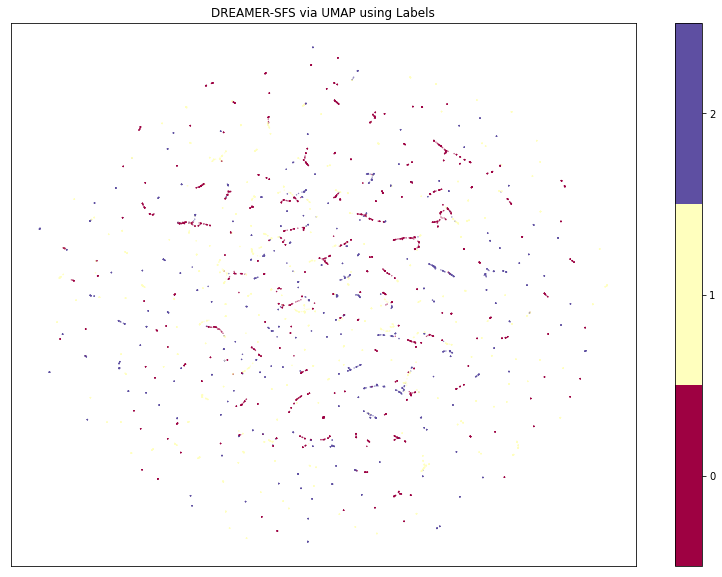

In [28]:
data = np.array(np.vstack([X_train_ss_sfs_knn, X_test_ss_sfs_knn]), dtype=np.float64) / 255.0
target = np.hstack([y_train, y_test])
classes = [
    '0',
    '1',
    '2']

import umap

embedding = umap.UMAP().fit_transform(data, y=target)
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('DREAMER-SFS via UMAP using Labels')
plt.show()


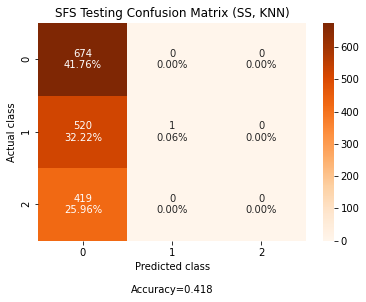

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2 while Y.shape[1] == 1143

In [21]:
#DIMENSIONALITY REDUCTION

# X_train_ss_sfs_knn = sfs_ss_knn.transform(X_train_ss)
# X_test_ss_sfs_knn = sfs_ss_knn.transform(X_test_ss)

# X_train_mm_sfs_knn = sfs_mm_knn.transform(X_train_mm)
# X_test_mm_sfs_knn = sfs_mm_knn.transform(X_test_mm)

#5. Apply PCA

data = np.array(np.vstack([X_train_ss_sfs_knn, X_test_ss_sfs_knn]), dtype=np.float64) / 255.0
target = np.hstack([y_train, y_test])
classes = [
    '0',
    '1',
    '2']




from sklearn.decomposition import KernelPCA
iso = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_mm_sfs_knn = iso.fit_transform(X_train_mm_sfs_knn, y_train)
X_test_mm_sfs_knn = iso.transform(X_test_mm_sfs_knn)
# explained_variance = lda.explained_variance_ratio_

#6. Fit the Logistic Regression to the Training set

classifier = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='hamming')
classifier.fit(X_train_mm_sfs_knn, y_train)


#7. Predict the Test set results

y_pred = classifier.predict(X_test_mm_sfs_knn)


#8. Make the Confusion Matrix

pca_cm = confusion_matrix(y_test, y_pred)
fig_pca = make_confusion_matrix(pca_cm, figsize=(6,4), title='SFS Testing Confusion Matrix (SS, KNN)', cbar=True, cmap='Oranges')
# plt.savefig('/home/ceci/Desktop/perf/DATA_MU/CF/SFS_PN_SS_KNN.png')
plt.show()

#9. Visualize the Training set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train_ss_sfs_knn, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('KNN-SFS-PCA (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#10.Visualize the Test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test_ss_sfs_knn, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('KNN-SFS-PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
